In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function, division
from builtins import range, input

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob


In [ ]:
import os
data_path = os.path.abspath('drive/My Drive/Diabetes/gaussian_filtered_images/gaussian_filtered_images')

In [ ]:
vgg = VGG19(input_shape=[224,224,3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(5, activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(validation_split=0.2, preprocessing_function = preprocess_input)

In [ ]:
train_generator = datagen.flow_from_directory(
    data_path,
    subset='training',
    target_size=[224,224],
    classes = ['Mild','No_DR','Moderate','Proliferate','Severe'],
    class_mode = 'categorical')

Found 2695 images belonging to 5 classes.


In [ ]:
valid_generator = datagen.flow_from_directory(
    data_path, 
    subset='validation',
    target_size=[224,224],
    classes = ['Mild','No_DR','Moderate','Proliferate','Severe'],
    class_mode = 'categorical')

Found 672 images belonging to 5 classes.


In [ ]:
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=16,
  steps_per_epoch= len(train_generator),
  verbose = 1)

Epoch 1/16
85/85 [==============================] - 16s 186ms/step - loss: 2.4847 - accuracy: 0.8950 - val_loss: 6.7897 - val_accuracy: 0.7872
Epoch 2/16
85/85 [==============================] - 17s 195ms/step - loss: 2.1365 - accuracy: 0.9017 - val_loss: 5.6014 - val_accuracy: 0.8274
Epoch 3/16
85/85 [==============================] - 16s 192ms/step - loss: 1.6327 - accuracy: 0.9191 - val_loss: 5.5265 - val_accuracy: 0.8214
Epoch 4/16
85/85 [==============================] - 16s 185ms/step - loss: 1.5278 - accuracy: 0.9351 - val_loss: 5.4298 - val_accuracy: 0.8214
Epoch 5/16
85/85 [==============================] - 16s 183ms/step - loss: 1.7178 - accuracy: 0.9213 - val_loss: 5.6579 - val_accuracy: 0.8348
Epoch 6/16
85/85 [==============================] - 16s 185ms/step - loss: 1.5415 - accuracy: 0.9325 - val_loss: 5.2603 - val_accuracy: 0.8304
Epoch 7/16
85/85 [==============================] - 16s 189ms/step - loss: 1.1101 - accuracy: 0.9421 - val_loss: 8.5775 - val_accuracy: 0.7619

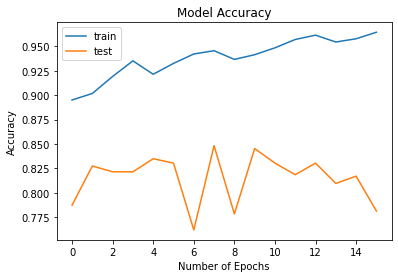

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg19_diabetes.h5')